# Computer Lab Exercises week 6 (SOLUTIONS)

* These lab exercises are designed to introduce the use of SQL to extract information from a database.
* A screencast on downloading jupyter notebooks from the online store.
https://youtu.be/1zY7hIj5tWg
* These exercises are **not** part of the assessment of the Module.
* I will post the solutions roughly 1 week after this file has been uploaded to the DLE.
* Please note that pasting python from pdf can sometimes cause problems. For example quotation marks can sometimes be converted incorrectly, so then running python will cause errors.

* See https://sites.google.com/view/pythonforstemstudents/home for a collection
of links to information on python.


## Question 1  Questions about SQL

Thare is a list of SQL commands at https://www.w3schools.com/sql/sql_syntax.asp.


Download the SQLite file from **SimpleFolks for Simple SQL**
http://2016.padjo.org/files/data/starterpack/simplefolks.sqlite The file simplefolks.sqlite needs to be in the same directory as this notebook.

You can read more about the dataset at http://2016.padjo.org/tutorials/sql-simplefolks-select-from/

The above database has the following tables:
homes, inmates, people, pets and politicians.
The people database has the column names: 
name, sex and age.

Use SQL via python to answer the following questions.


* Find all the names in the people table.
* Find all the names in the people table, for the people younger than 30 years old.
* Find all the names of the men in the people table.
* Find the average age of the people in the people table.
* Find the table names from the database file.


In [7]:
import sqlite3
connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

# you can change the SQL command
cursor.execute("SELECT * FROM people") 
print("List the content of the people table")
result = cursor.fetchall() 
for r in result:
    print(r)


List the content of the people table
('Austin', 'M', 33)
('Blair', 'M', 90)
('Carolina', 'F', 28)
('Dani', 'F', 41)
('Donald', 'M', 70)
('Eliza', 'F', 37)
('Farida', 'F', 23)
('Georgina', 'F', 19)
('Hillary', 'F', 68)
('Leland', 'M', 16)
('Liam', 'M', 22)
('Michael', 'M', 48)
('Phoebe', 'F', 52)
('Sherry', 'F', 39)
('Zed', 'M', 42)


In [8]:
# Put your solution here

In [9]:
#  Put your solutions here

import sqlite3

connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

##################################################
cursor.execute("SELECT name FROM people") 
print("List of all the  names")
result = cursor.fetchall() 
for r in result:
    print(r[0])


##################################################
cursor.execute("SELECT name FROM people where age < 30") 
print("List of all the  names under 30")
result = cursor.fetchall() 
for r in result:
    print(r[0])

##################################################
cursor.execute("SELECT name FROM people where sex='M' ") 
print("List of males")
result = cursor.fetchall() 
for r in result:
    print(r[0])


##################################################
cursor.execute("SELECT Avg(Age) FROM people") 
result = cursor.fetchall() 
print("Average age = ", result)

##################################################
## https://stackoverflow.com/questions/34570260/how-to-get-table-names-using-sqlite3-through-python/34570549
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") 
result = cursor.fetchall() 

print("The table names in the database")
for r in result:
    print(r[0])




List of all the  names
Austin
Blair
Carolina
Dani
Donald
Eliza
Farida
Georgina
Hillary
Leland
Liam
Michael
Phoebe
Sherry
Zed
List of all the  names under 30
Carolina
Farida
Georgina
Leland
Liam
List of males
Austin
Blair
Donald
Leland
Liam
Michael
Zed
Average age =  [(41.86666666666667,)]
The table names in the database
homes
people
pets
inmates
politicians


##  Question 2: SQL and python


We have been using python to run SQL 
queries from a SQLite database. However,
we have used a separate python script for
each query. It would be better to ask the
user for the SQL query.

In [10]:
sql_ = input("Input SQL command")
print("Executing ", sql_)

Input SQL commandselect * from people
Executing  select * from people


Modify the cell above so the user can input an abrbitary SQL statement 
on the simplefolks.sqlite database.
Also include exception handling
to check for errors.



Please read about SQL injection attacks at
https://www.tutlane.com/tutorial/sqlite/sqlite-injection-attacks.
This is just for information.

In [11]:
# put your solution here

In [12]:
# put your solution here

import sqlite3
connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

sql_ = input("Input SQL command")
print("Executing ", sql_)

# you can change the SQL command
try:
  cursor.execute(sql_) 
except:
    print("Error with " , sql_)


print("Results from ", sql_)
result = cursor.fetchall() 
for r in result:
    print(r)

Input SQL commandselect * from people
Executing  select * from people
Results from  select * from people
('Austin', 'M', 33)
('Blair', 'M', 90)
('Carolina', 'F', 28)
('Dani', 'F', 41)
('Donald', 'M', 70)
('Eliza', 'F', 37)
('Farida', 'F', 23)
('Georgina', 'F', 19)
('Hillary', 'F', 68)
('Leland', 'M', 16)
('Liam', 'M', 22)
('Michael', 'M', 48)
('Phoebe', 'F', 52)
('Sherry', 'F', 39)
('Zed', 'M', 42)


##  Question 3, plotting the data from a database

Use SQL to extract the ages of the Males and Females seperately. Plot the ages of the males and females in the same histogram. The plot should look like the figure below.


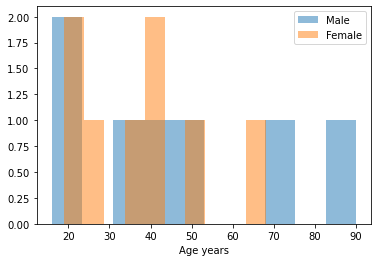

In [13]:
import sqlite3
import matplotlib.pyplot as plt

connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

# Find the ages of males
cursor.execute("SELECT age FROM people where sex='M' ") 
result = cursor.fetchall() 
male_age = []
for r in result:
    male_age.append(r[0])

# Find the ages of females
cursor.execute("SELECT age FROM people where sex='F' ") 
result = cursor.fetchall() 
female_age = []
for r in result:
    female_age.append(r[0])


# The alpha parameter controls the transparancy of the hstogram  
# https://www.adamsmith.haus/python/answers/how-to-plot-two-histograms-on-one-plot-using-matplotlib-in-python
plt.hist(male_age, label="Male", alpha=0.5,)
plt.hist(female_age, label="Female" , alpha=0.5,)
plt.xlabel("Age years")
plt.legend()
plt.show()